In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_train = df[['petal_length' ,'petal_width']]
species_to_num = {'setosa' : 0 , 'versicolor' : 1 , 'virginica' : 2}

df['species'] = df['species'].map(species_to_num)
y_train = df['species']

In [4]:
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

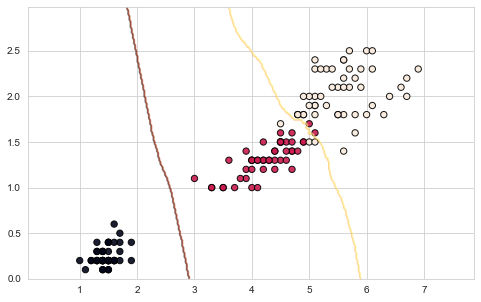

In [5]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min , x_max = Xv.min() , Xv.max() + 1
y_min , y_max = y_train.min() , y_train.max() + 1

xx , yy = np.meshgrid(np.arange(x_min , x_max , h) ,
                      np.arange(y_min , y_max , h))

z = knn.predict(np.c_[xx.ravel() , yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize =(8,5))

ax = plt.contour(xx , yy, z , cmap = 'afmhot' , alpha = 0.3)
plt.scatter(X_train.values[:,0] , X_train.values[:,1] , 
            c = y_train,s = 40,alpha = 0.9,edgecolors = 'k')

# Project Cancer Detection 

In [6]:
col = ['id', 'Clump Thickness' , 'Uniformity of cell size' , 
      'Uniformity of cell Shape','Marginal Adhesion', 
      'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
     'Normal Nuclei' , 'Mitoses' , 'Class']

df = pd.read_csv('breast-cancer-wisconsin.data.csv',names = col,
                header = None)
df.head()

,id,Clump Thickness,Uniformity of cell size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Pre-Processing

In [7]:
np.where(df.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of cell size        699 non-null int64
Uniformity of cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nuclei                  699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [10]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [11]:
df[df['Bare Nuclei']=='?']

,id,Clump Thickness,Uniformity of cell size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [12]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [13]:
df['Bare Nuclei'].replace('?',np.NAN,inplace = True)
df = df.dropna()

Class 2 is benign and Class 4 is malignant

$$\frac{\text{df["Class"]}}{2} -1$$

In [14]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
df["Class"] = df["Class"] / 2 - 1

In [16]:
df['Class'].value_counts()

0.0    444
1.0    239
Name: Class, dtype: int64

In [17]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of cell size',
       'Uniformity of cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nuclei', 'Mitoses', 'Class'],
      dtype='object')

In [18]:
X = df.drop(['id' , 'Class'] , axis = 1)
x_col = X.columns

In [19]:
y = df['Class']

In [20]:
X = StandardScaler().fit_transform(X.values)

In [21]:
df1 = pd.DataFrame(X , columns=x_col)
df1.head()

,Clump Thickness,Uniformity of cell size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [22]:
X_train,X_test,y_train,y_test = train_test_split(df1,y,train_size = 0.8 , random_state = 42)

In [23]:
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['id','Class'],axis = 1).values),columns = x_col).head()

,Clump Thickness,Uniformity of cell size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nuclei,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [24]:
knn = KNeighborsClassifier(n_neighbors=5,p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
def print_score(clf,X_train,y_train,X_test,y_test,train = True):
    if train:
        print("Train Result:\n")
        print("accuracy score : {0:.4f}\n".format(accuracy_score(y_train,clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train,clf.predict(X_train))))
        print("Confusion Matrix :\n {} \n".format(confusion_matrix(y_train , clf.predict(X_train))))
        
        res = cross_val_score(clf,X_train,y_train,cv = 10 , scoring= 'accuracy')
        print("Average Accuracy : \t {0:.4f}".format(np.mean(res)))
        print("Average SD : \t\t {0:.4f}".format(np.std(res)))
        
    elif train == False:
        print("Test Result:\n")
        print("accuracy score : {0:.4f}\n".format(accuracy_score(y_test,clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test,clf.predict(X_test))))
        print("Confusion Matrix :\n {} \n".format(confusion_matrix(y_test , clf.predict(X_test))))


In [26]:
print_score(knn,X_train,y_train,X_test,y_test,train=True)

Train Result:

accuracy score : 0.9725

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix :
 [[358   7]
 [  8 173]] 

Average Accuracy : 	 0.9635
Average SD : 		 0.0162


In [27]:
print_score(knn,X_train,y_train,X_test,y_test,train=False)

Test Result:

accuracy score : 0.9562

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix :
 [[78  1]
 [ 5 53]] 



In [28]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [29]:
params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}

In [31]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1,verbose=1)
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [32]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [33]:
print_score(grid_search_cv,X_train,y_train,X_test,y_test,train=True)

Train Result:

accuracy score : 0.9725

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix :
 [[358   7]
 [  8 173]] 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Average Accuracy : 	 0.9635
Average SD : 		 0.0181


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [34]:
print_score(grid_search_cv,X_train,y_train,X_test,y_test,train=False)

Test Result:

accuracy score : 0.9562

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix :
 [[78  1]
 [ 5 53]] 



In [35]:
grid_search_cv.best_params_

{'n_neighbors': 7}

In [36]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.0086604 , 0.0073297 , 0.00833058, 0.00533072, 0.01099428,
        0.0109942 , 0.02332131, 0.00666237, 0.00699631, 0.00866151]),
 'std_fit_time': array([0.0018852 , 0.0004707 , 0.0055531 , 0.00124804, 0.00848124,
        0.00711287, 0.0259143 , 0.0012463 , 0.00141332, 0.00590337]),
 'mean_score_time': array([0.01632484, 0.01699003, 0.02198513, 0.02098743, 0.02998161,
        0.04563951, 0.04780769, 0.05063772, 0.03431336, 0.02098807]),
 'std_score_time': array([0.00124609, 0.00244795, 0.00141232, 0.00454216, 0.0184461 ,
        0.01442233, 0.0167546 , 0.01585114, 0.00543347, 0.00215906]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


In [37]:
from sklearn import svm 
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train,y_train)
print_score(clf,X_train,y_train,X_test,y_test,train=True)
print_score(clf,X_train,y_train,X_test,y_test,train=False)

Train Result:

accuracy score : 0.9799

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       365
         1.0       0.96      0.98      0.97       181

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546


Confusion Matrix :
 [[358   7]
 [  4 177]] 

Average Accuracy : 	 0.9635
Average SD : 		 0.0199
Test Result:

accuracy score : 0.9635

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        79
         1.0       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix :
 [[77  2]
 [ 3 55]] 



In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
print_score(clf,X_train,y_train,X_test,y_test,train=True)
print_score(clf,X_train,y_train,X_test,y_test,train=False)

Train Result:

accuracy score : 0.9982

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      0.99      1.00       181

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546


Confusion Matrix :
 [[365   0]
 [  1 180]] 

Average Accuracy : 	 0.9579
Average SD : 		 0.0164
Test Result:

accuracy score : 0.9416

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        79
         1.0       0.98      0.88      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137


Confusion Matrix :
 [[78  1]
 [ 7 51]] 



In [39]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train,y_train)
print_score(clf,X_train,y_train,X_test,y_test,train=True)
print_score(clf,X_train,y_train,X_test,y_test,train=False)

Train Result:

accuracy score : 0.9927

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       365
         1.0       0.98      0.99      0.99       181

    accuracy                           0.99       546
   macro avg       0.99      0.99      0.99       546
weighted avg       0.99      0.99      0.99       546


Confusion Matrix :
 [[362   3]
 [  1 180]] 

Average Accuracy : 	 0.9616
Average SD : 		 0.0190
Test Result:

accuracy score : 0.9489

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix :
 [[78  1]
 [ 6 52]] 

